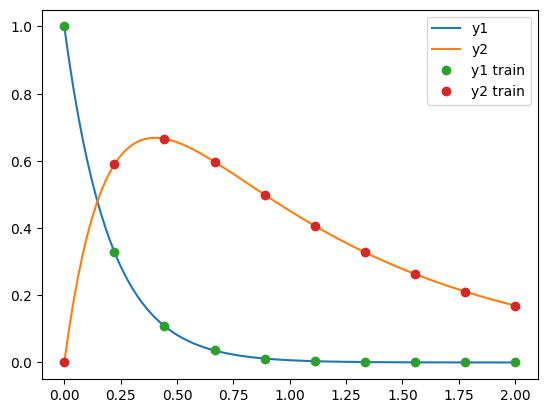

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from scipy.integrate import solve_ivp, odeint

# Define the system of ODEs
def model(y, t, k1, k2):
    dy1dt = -k1 * y[0]
    dy2dt = k1 * y[0] - k2 * y[1]
    return [dy1dt, dy2dt]

y0 = [1, 0]  # Initial conditions
T_START = 0
T_END = 2
t = np.linspace(T_START, T_END, 100)  # Adjust the time range as needed
k1 = 5
k2 = 1
solution = odeint(model, y0, t, args=(k1,k2))

# Make training data
n_samples = 10
t_train = np.linspace(T_START, 2, n_samples)
sol = odeint(model, y0, t_train, args=(k1,k2))
y_train_1 = sol[:, 0]
y_train_2 = sol[:,1]

# Visualize the solution
plt.figure()
plt.plot(t, solution[:, 0], label='y1')
plt.plot(t, solution[:, 1], label='y2')
plt.plot(t_train, y_train_1, 'o', label='y1 train')
plt.plot(t_train, y_train_2, 'o', label='y2 train')
plt.legend()
plt.show()

In [5]:
# Make training data
columns = [f'xA_{i}' for i in range(10)] + [f'xB_{i}' for i in range(10)] + ['k1', 'k2']
df = pd.DataFrame(columns=columns)

n_samples = 10
t_train = np.linspace(T_START, 2, n_samples)

for i in range(100):
    # Generate random parameters
    k1 = np.random.uniform(1, 10)
    k2 = np.random.uniform(1, 10)
    sol = odeint(model, y0, t_train, args=(k1,k2))
    y_train_1 = sol[:, 0]
    y_train_2 = sol[:,1]
    df.loc[len(df)] = np.concatenate([y_train_1, y_train_2, [k1, k2]])

In [6]:
import numpy as np
import torch
import torch.nn as nn

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        
        self.fc = nn.Linear(self.input_size, 10)
        self.relu = nn.ReLU()
        self.out = nn.Linear(10, self.output_size)
        
    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        x = self.out(x)
        return x
    
X_train = df.drop(columns=['k1', 'k2']).values
y_train = df[['k1', 'k2']].values
X_train = torch.tensor(X_train, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_train, dtype=torch.float32).to(DEVICE)

net = Net(X_train.shape[1], y_train.shape[1]).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

EPOCHS = 10000
for epoch in range(EPOCHS):
    net.train()
    optimizer.zero_grad()
    y_pred = net(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch} loss: {loss.item()}')

Epoch 0 loss: 39.02727508544922
Epoch 100 loss: 6.2540974617004395
Epoch 200 loss: 2.665336847305298
Epoch 300 loss: 1.1518059968948364
Epoch 400 loss: 0.6449701189994812
Epoch 500 loss: 0.39294132590293884
Epoch 600 loss: 0.2705804109573364
Epoch 700 loss: 0.2166333943605423
Epoch 800 loss: 0.19146870076656342
Epoch 900 loss: 0.17555277049541473
Epoch 1000 loss: 0.1645965576171875
Epoch 1100 loss: 0.15588997304439545
Epoch 1200 loss: 0.14740823209285736
Epoch 1300 loss: 0.14025329053401947
Epoch 1400 loss: 0.13391511142253876
Epoch 1500 loss: 0.12791813910007477
Epoch 1600 loss: 0.12102355808019638
Epoch 1700 loss: 0.1101614385843277
Epoch 1800 loss: 0.10068435966968536
Epoch 1900 loss: 0.09452930092811584
Epoch 2000 loss: 0.09068563580513
Epoch 2100 loss: 0.08781546354293823
Epoch 2200 loss: 0.08552847057580948
Epoch 2300 loss: 0.08359260857105255
Epoch 2400 loss: 0.08184437453746796
Epoch 2500 loss: 0.08020097017288208
Epoch 2600 loss: 0.07863331586122513
Epoch 2700 loss: 0.07712536

In [11]:
# Make training data
n_samples = 10
k1=2.3
k2=3.3
t_train = np.linspace(T_START, 2, n_samples)
sol = odeint(model, y0, t_train, args=(k1,k2))
y_train_1 = sol[:, 0]
y_train_2 = sol[:,1]

df_test = pd.DataFrame(columns=columns)
df_test.loc[len(df_test)] = np.concatenate([y_train_1, y_train_2, [k1, k2]])
X_test = df_test.drop(columns=['k1', 'k2']).values
y_test = df_test[['k1', 'k2']].values
X_test = torch.tensor(X_test, dtype=torch.float32).to(DEVICE)
y_test = torch.tensor(y_test, dtype=torch.float32).to(DEVICE)

net.eval()
y_pred = net(X_test)
print(y_pred)


tensor([[2.2194, 3.3086]], grad_fn=<AddmmBackward0>)


# Lotka-Volterra 

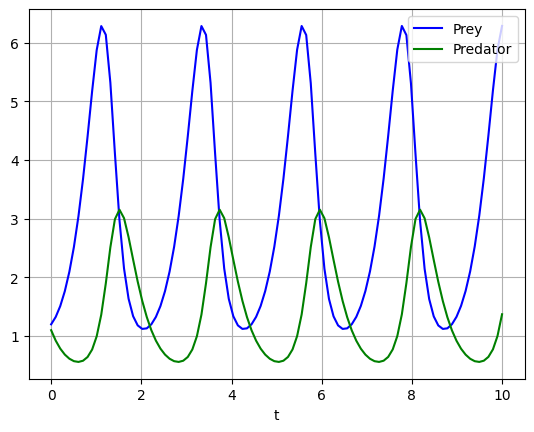

In [49]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def lotka_volterra(y, t, a, b, c, d):  # Reorder parameters to match odeint convention
    y1, y2 = y
    dy1dt = a*y1 - b*y1*y2
    dy2dt = -c*y2 + d*y1*y2
    return [dy1dt, dy2dt]

z0 = [1.2, 1.1]
a = 3
b = 2
c = 3
d = 1
t = np.linspace(0, 10, 100)

sol = odeint(lotka_volterra, z0, t, args=(a, b, c, d))  # Swap y and t parameters

plt.plot(t, sol[:, 0], 'b', label='Prey')
plt.plot(t, sol[:, 1], 'g', label='Predator')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


In [75]:
# Make training data
columns = [f'xA_{i}' for i in range(10)] + [f'xB_{i}' for i in range(10)] + ['a','b','c','d']
df = pd.DataFrame(columns=columns)

n_samples=10
t_train = np.linspace(0, 10, n_samples)

for i in range(3000):
    # Generate random parameters
    a = np.random.uniform(1, 5)
    b = np.random.uniform(1, 5)
    c = np.random.uniform(1, 5)
    d = np.random.uniform(1, 5)
    sol = odeint(lotka_volterra, z0, t_train, args=(a, b, c, d))
    df.loc[len(df)] = np.concatenate([sol[:, 0], sol[:, 1], [a, b, c, d]])
    

In [84]:
import numpy as np
import torch
import torch.nn as nn

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        
        self.fc = nn.Linear(self.input_size, 32)
        self.relu = nn.ReLU()
        self.out = nn.Linear(32, self.output_size)
        
    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        x = self.out(x)
        return x
    
X_train = df.drop(columns=['a','b','c','d']).values
y_train = df[['a','b','c','d']].values
X_train = torch.tensor(X_train, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_train, dtype=torch.float32).to(DEVICE)

net = Net(X_train.shape[1], y_train.shape[1]).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

EPOCHS = 50000
for epoch in range(EPOCHS):
    net.train()
    optimizer.zero_grad()
    y_pred = net(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print(f'Epoch {epoch} loss: {loss.item()}')

Epoch 0 loss: 10.147513389587402
Epoch 1000 loss: 0.3393723666667938
Epoch 2000 loss: 0.29078036546707153
Epoch 3000 loss: 0.2725073993206024
Epoch 4000 loss: 0.27265483140945435
Epoch 5000 loss: 0.2606578767299652
Epoch 6000 loss: 0.2575770914554596
Epoch 7000 loss: 0.26105237007141113
Epoch 8000 loss: 0.2520729899406433
Epoch 9000 loss: 0.24951255321502686
Epoch 10000 loss: 0.24941419064998627
Epoch 11000 loss: 0.24461689591407776
Epoch 12000 loss: 0.2415943145751953
Epoch 13000 loss: 0.24116632342338562
Epoch 14000 loss: 0.24505889415740967
Epoch 15000 loss: 0.23828960955142975
Epoch 16000 loss: 0.23691952228546143
Epoch 17000 loss: 0.23624198138713837
Epoch 18000 loss: 0.2339574247598648
Epoch 19000 loss: 0.2330813854932785
Epoch 20000 loss: 0.24379213154315948
Epoch 21000 loss: 0.23777393996715546
Epoch 22000 loss: 0.23145437240600586
Epoch 23000 loss: 0.23244106769561768
Epoch 24000 loss: 0.2379031926393509
Epoch 25000 loss: 0.2292669713497162
Epoch 26000 loss: 0.2308626919984817

In [92]:
n_samples = 10
a=3
b=2
c=3
d=1

t_train = np.linspace(0, 10, n_samples)
sol = odeint(lotka_volterra, z0, t_train, args=(a,b,c,d))
y_train_1 = sol[:, 0]
y_train_2 = sol[:,1]

df_test = pd.DataFrame(columns=columns)
df_test.loc[len(df_test)] = np.concatenate([y_train_1, y_train_2, [a, b, c, d]])
X_test = df_test.drop(columns=['a', 'b', 'c', 'd']).values
y_test = df_test[['a', 'b', 'c', 'd']].values
X_test = torch.tensor(X_test, dtype=torch.float32).to(DEVICE)
y_test = torch.tensor(y_test, dtype=torch.float32).to(DEVICE)

net.eval()
y_pred = net(X_test)
print(y_pred)



tensor([[1.6064, 1.3604, 4.9749, 1.3583]], grad_fn=<AddmmBackward0>)


In [93]:
X_test

tensor([[1.2000, 6.2847, 1.2004, 6.2854, 1.2008, 6.2862, 1.2013, 6.2869, 1.2017,
         6.2876, 1.1000, 1.3638, 1.0991, 1.3658, 1.0983, 1.3678, 1.0974, 1.3697,
         1.0965, 1.3717]])

# System Identification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from scipy.integrate import solve_ivp, odeint

# Define the system of ODEs
def model_A(y, t, k1, k2):
    dy1dt = -k1 * y[0]
    dy2dt = k1 * y[0] - k2 * y[1]
    return [dy1dt, dy2dt]


def model_B(y, t, a, b, c, d):  # Reorder parameters to match odeint convention
    y1, y2 = y
    dy1dt = a*y1 - b*y1*y2
    dy2dt = -c*y2 + d*y1*y2
    return [dy1dt, dy2dt]

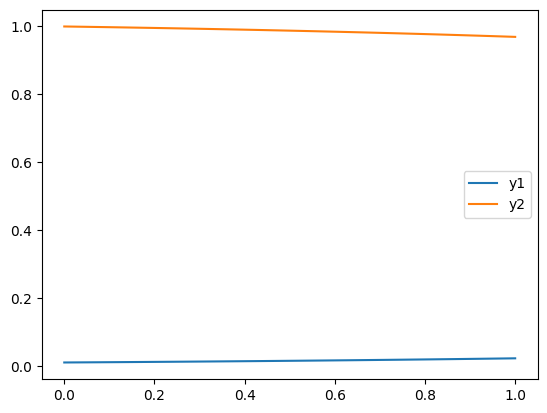

In [57]:
# Ceasar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from scipy.integrate import solve_ivp, odeint

# Define the system of ODEs
def model(y, t, k1, k2):
    dy1dt = k1 * y[0]
    dy2dt = - k2 * y[0] 
    return [dy1dt, dy2dt]

y0 = [0.01, 1]  # Initial conditions
T_START = 0
T_END = 1
t = np.linspace(T_START, T_END, 100)  # Adjust the time range as needed
k1 = 0.8
k2 = 2

solution = odeint(model, y0, t, args=(k1,k2))

# plot  
plt.figure()
plt.plot(t, solution[:, 0], label='y1')
plt.plot(t, solution[:, 1], label='y2')
plt.legend()
plt.show()



In [30]:
# Make training data
columns = [f'xA_{i}' for i in range(8)] + [f'xB_{i}' for i in range(8)] + ['k1', 'k2', 'k3']
df = pd.DataFrame(columns=columns)

n_samples = 10
t_train = np.linspace(T_START, 2, n_samples)

for i in range(100):
    # Generate random parameters
    k1 = np.random.uniform(1, 10)
    k2 = np.random.uniform(1, 10)
    k3 = np.random.uniform(1, 10)
    sol = odeint(model, y0, t_train, args=(k1,k2))
    y_train_1 = sol[:, 0]
    y_train_2 = sol[:,1]
    df.loc[len(df)] = np.concatenate([y_train_1, y_train_2, [k1, k2, k3]])

TypeError: model() missing 1 required positional argument: 'k3'

/tmp/ipykernel_104634/1801487556.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time'] = df_1['Time']/time_max
/tmp/ipykernel_104634/1801487556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Glucose'] = df_1['Glucose']/glc_max
/tmp/ipykernel_104634/1801487556.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

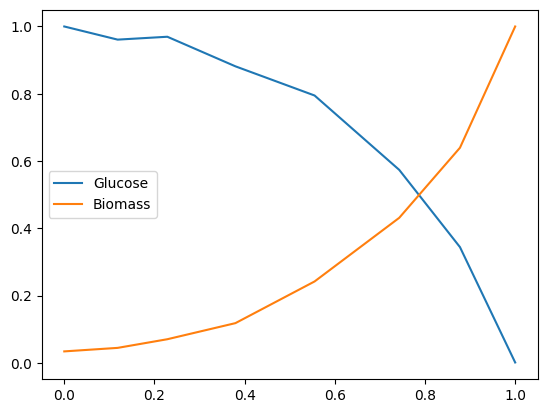

In [20]:
# Read xlsx data_ceasar
df = pd.read_excel('data_ceasar.xlsx')
df_1 = df[df['exp']==1]

# Nomralize data
time_max = df_1['Time'].max()
glc_max = df_1['Glucose'].max()
bio_max = df_1['Biomass'].max()

df_1['Time'] = df_1['Time']/time_max
df_1['Glucose'] = df_1['Glucose']/glc_max
df_1['Biomass'] = df_1['Biomass']/bio_max

# Plot
plt.figure()
plt.plot(df_1['Time'], df_1['Glucose'], label='Glucose')
plt.plot(df_1['Time'], df_1['Biomass'], label='Biomass')
plt.legend()
plt.show()

In [22]:
df_1

,Time,Glucose,Biomass,exp
0,0.000000,1.000000,0.034413,1
1,0.118367,0.960928,0.044849,1
2,0.228571,0.969475,0.070561,1
3,0.379592,0.881563,0.118386,1
4,0.555102,0.794872,0.242229,1
5,0.742857,0.573871,0.431375,1
6,0.877551,0.344322,0.639608,1
7,1.000000,0.001465,1.000000,1
